## 15. Ordered Bar Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [3]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
warnings.filterwarnings('ignore')

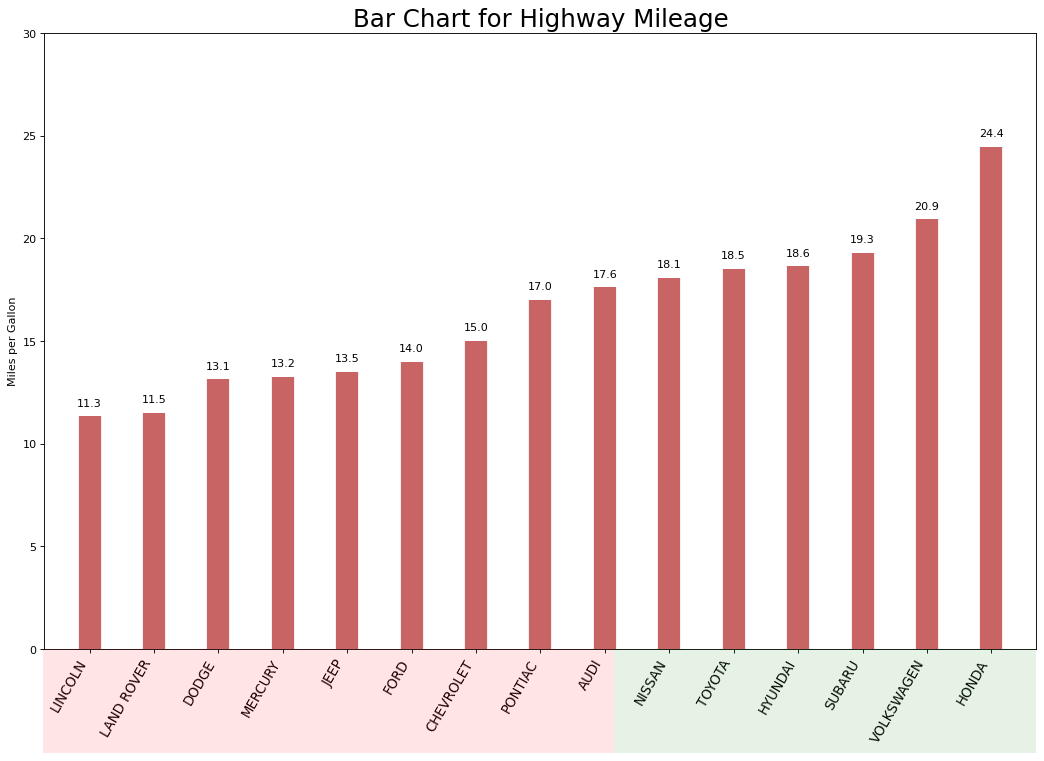

In [13]:
#Draw plot
import matplotlib.patches as patches
fig,ax=plt.subplots(figsize=(16,10),facecolor='white',dpi=80)
ax.vlines(x=df.index,ymin=0,ymax=df.cty,color='firebrick',alpha=0.7,linewidth=20)
#Annotate Text
for i,cty in enumerate(df.cty):
    ax.text(i,cty+0.5,round(cty,1),horizontalalignment='center')

#Title, Label,Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage',fontdict={'size':22})
ax.set(ylabel="Miles per Gallon",ylim=(0,30))
plt.xticks(df.index,df.manufacturer.str.upper(),rotation=60,horizontalalignment='right',fontsize=12)

#Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.02), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.02), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()


## 16. Lollipop Chart

In [14]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

In [15]:
df.sort_values('cty',inplace=True)
df.reset_index(inplace=True)

In [17]:
df

manufacturer        cty
0       lincoln  11.333333
1    land rover  11.500000
2         dodge  13.135135
3       mercury  13.250000
4          jeep  13.500000
5          ford  14.000000
6     chevrolet  15.000000
7       pontiac  17.000000
8          audi  17.611111
9        nissan  18.076923
10       toyota  18.529412
11      hyundai  18.642857
12       subaru  19.285714
13   volkswagen  20.925926
14        honda  24.444444

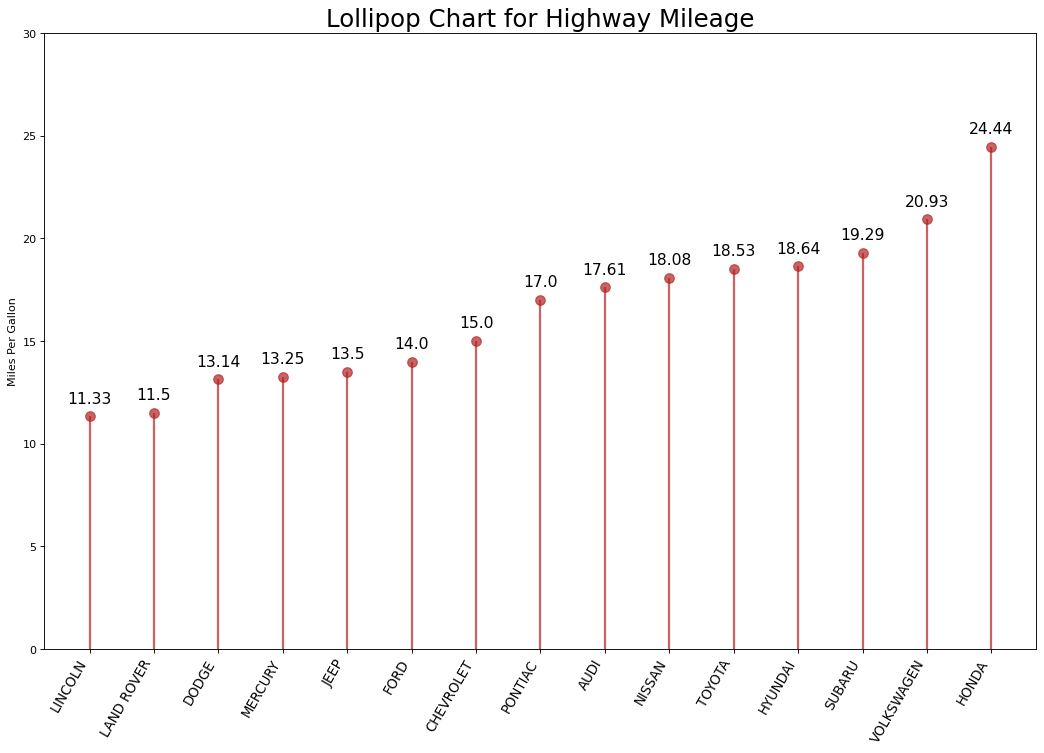

In [20]:
#draw plot
fig,ax=plt.subplots(figsize=(16,10),dpi=80)
ax.vlines(x=df.index,ymin=0,ymax=df.cty,color='firebrick',alpha=0.7,linewidth=2)
ax.scatter(x=df.index,y=df.cty,s=75,color='firebrick',alpha=0.7)


#Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

#Annotate
#itertuples:Iterate over DataFrame rows as namedtuples
for row in df.itertuples():
    ax.text(row.Index,row.cty+.5,s=round(row.cty,2),horizontalalignment='center',verticalalignment='bottom', fontsize=14)
plt.show()    

## 17. Dot Plot
since it is aligned along the horizontal axis, you can visualize how far the points are from each other more easily.
- 变量在x-axies！

In [21]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

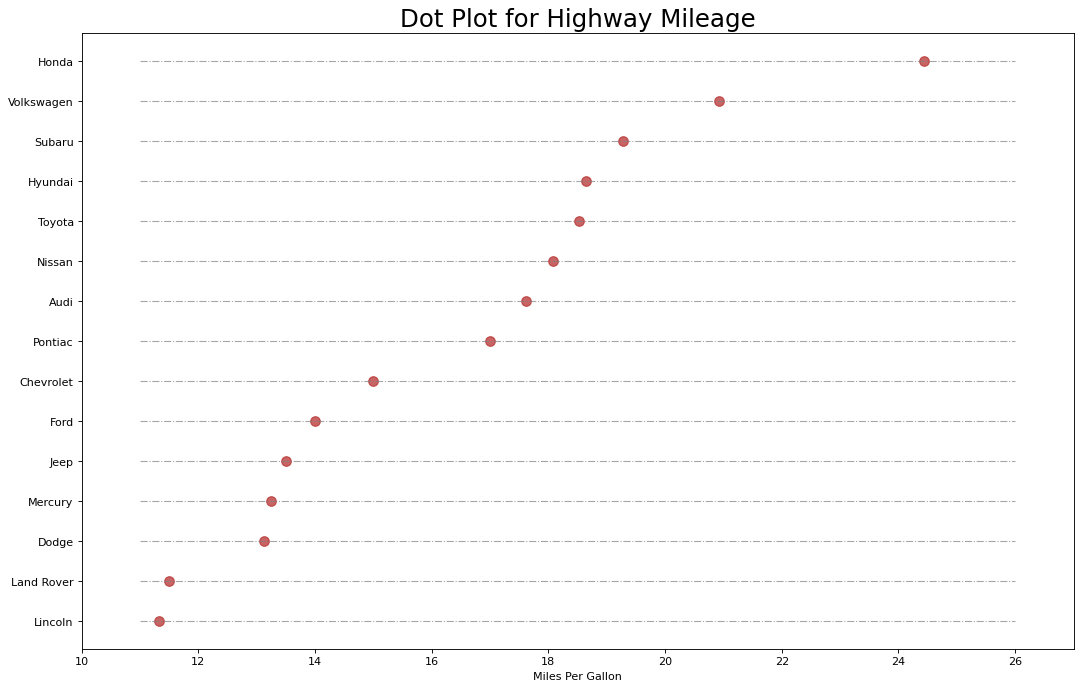

In [23]:
#Draw plots
fig,ax=plt.subplots(figsize=(16,10),dpi=80)

###draw the horizontal line part
ax.hlines(y=df.index,xmin=11,xmax=26,color='gray',alpha=0.7,linewidth=1,
         linestyles='dashdot')

#draw the scatter plots part
ax.scatter(y=df.index,x=df.cty,s=75,color='firebrick',alpha=0.7)


# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()




## 18. Slope Chart**

- compare before vs after positions
* mlines.Line2D(xdata, ydata) method!! 划线

In [25]:
import matplotlib.lines as mlines

In [26]:
#load data
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

In [27]:
df

continent          1952          1957
0    Africa   1252.572466   1385.236062
1  Americas   4079.062552   4616.043733
2      Asia   5195.484004   4003.132940
3    Europe   5661.057435   6963.012816
4   Oceania  10298.085650  11598.522455

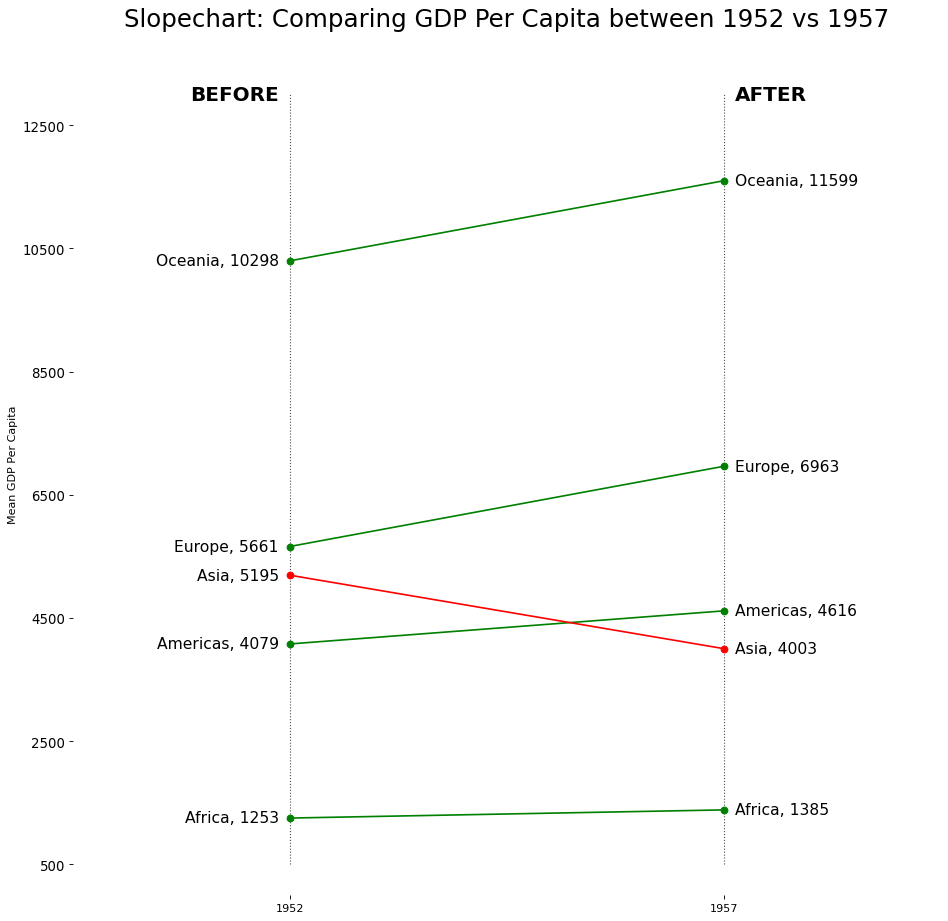

In [38]:
# make labels 
left_label=[str(c)+", "+ str(round(y)) for c,y in zip(df.continent,df['1952'])]
right_label=[str(c)+", "+str(round(y)) for c,y in zip(df.continent, df['1957'])]
# mark color: when the slope is increasing use green otherwise use red.
kclass=['red'if y1<y2 else 'green' for y1,y2 in zip(df['1952'],df['1957'])]

#draw line
def newline(p1,p2,color='black'):
    ax=plt.gca()
    l=mlines.Line2D([p1[0],p2[0]],[p1[1],p2[1]], color='red' if p1[1]>p2[1] else 'green',
                  marker='o',markersize=6)
    ax.add_line(l)
    return l

fig,ax=plt.subplots(1,1,figsize=(14,14),dpi=80)
#vertical lines
ax.vlines(x=1,ymin=500,ymax=13000,color='black',alpha=0.7,linewidth=1,linestyles='dotted')
ax.vlines(x=3,ymin=500,ymax=13000,color='black',alpha=0.7,linewidth=1,linestyles='dotted')


#points
ax.scatter(y=df['1952'],x=np.repeat(1,df.shape[0]),s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'],x=np.repeat(3,df.shape[0]),s=10, color='black', alpha=0.7)

## draw lines and add annotation
for p1,p2,c in zip(df['1952'],df['1957'],df['continent']):
    newline([1,p1],[3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()


## 19. Dumbbell Plot

- still use mlines.Line2D to define functions to draw lines

In [39]:
import matplotlib.lines as mlines

In [43]:
#load data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values('pct_2014',inplace=True)
df.reset_index(inplace=True)
df

index               Area  pct_2014  pct_2013
0      25             Boston      0.04      0.04
1      23         Pittsburgh      0.06      0.07
2      22          Baltimore      0.06      0.09
3      24        Minneapolis      0.06      0.08
4      21      San Francisco      0.08      0.11
5      20            Seattle      0.08      0.12
6      19       Philadelphia      0.08      0.10
7      18            Detroit      0.09      0.11
8      17          St. Louis      0.09      0.10
9      16           Portland      0.09      0.13
10     15   Washington, D.C.      0.09      0.11
11     14             Denver      0.10      0.14
12     13           New York      0.10      0.12
13     12            Chicago      0.11      0.14
14     11    All Metro Areas      0.11      0.14
15     10          San Diego      0.12      0.16
16      9          Charlotte      0.13      0.15
17      8            Phoenix      0.13      0.17
18      7  Riverside, Calif.      0.14      0.19
19      6              Tampa      0.14      0.17
20      5        Los Angeles      0.14      0.20
21      4            Atlanta      0.15      0.18
22      3        San Antonio      0.15      0.19
23      2             Dallas      0.18      0.21
24      1              Miami      0.19      0.24
25      0            Houston      0.19      0.22

In [46]:
#Define a function to draw line segment
def newline(p1,p2,color='black'):
    ax=plt.gca()
    l=mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l


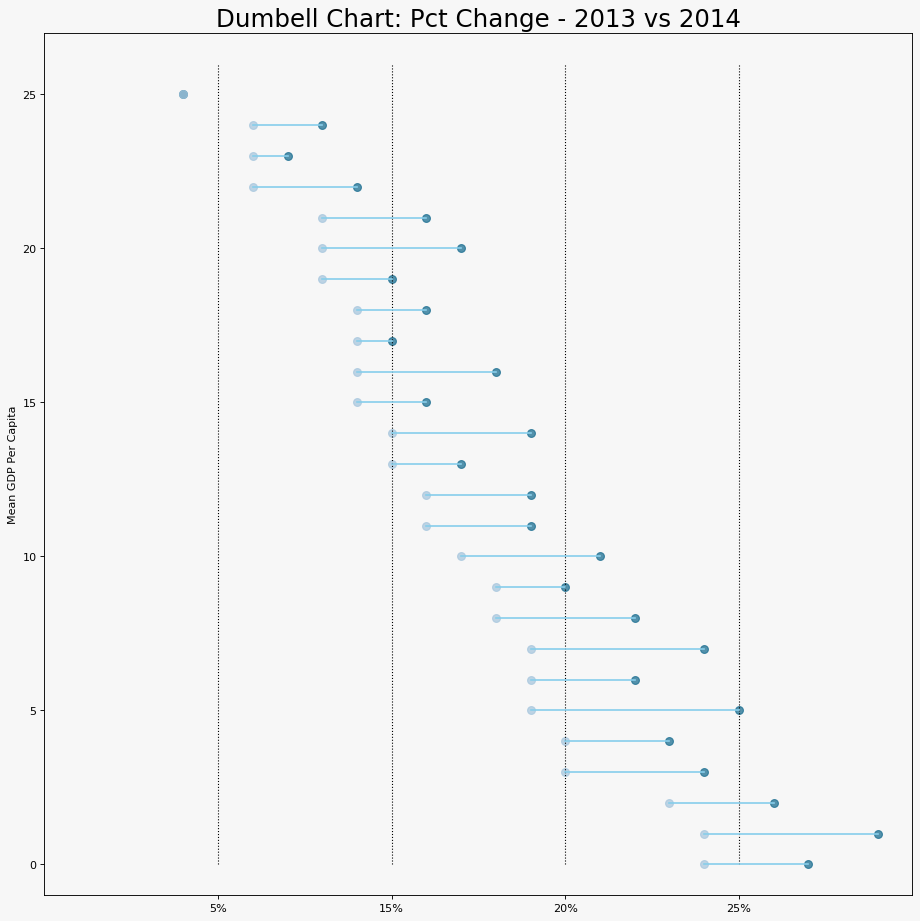

In [49]:
# Figure and Axes
fig,ax=plt.subplots(1,1,figsize=(14,14),facecolor='#f7f7f7', dpi= 80)
#Vertical lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
#points
ax.scatter(y=df['index'],x=df['pct_2013'],s=50,color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'],x=df['pct_2014'],s=50,color='#a3c4dc', alpha=0.7)
#line segments
for p1,p2,index in zip(df['pct_2013'],df['pct_2014'],df['index']):
    newline([p1,index],[p2,index])
# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()    